In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import re
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight = pd.read_csv("flight.csv")
test = pd.read_csv("test.csv")
hotel = pd.read_csv("hotel.csv")

# EDA

In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117946 entries, 0 to 117945
Data columns (total 14 columns):
account_id              117946 non-null object
order_id                117946 non-null object
member_duration_days    117946 non-null float64
gender                  117946 non-null object
trip                    117946 non-null object
service_class           117946 non-null object
price                   117946 non-null float64
is_tx_promo             117946 non-null object
no_of_seats             117946 non-null float64
airlines_name           117946 non-null object
route                   117946 non-null object
hotel_id                117946 non-null object
visited_city            117946 non-null object
log_transaction         117946 non-null object
dtypes: float64(3), object(11)
memory usage: 7.6+ MB


In [4]:
flight.describe()

,member_duration_days,price,no_of_seats
count,117946.000000,1.179460e+05,117946.000000
mean,955.586955,2.672772e+06,1.688595
std,565.292428,2.449247e+06,1.133721
min,329.000000,4.069520e+05,1.000000
25%,537.000000,1.282710e+06,1.000000
50%,678.000000,1.987061e+06,1.000000
75%,1341.000000,2.974400e+06,2.000000
max,2720.000000,5.903643e+07,11.000000


In [61]:
#Merubah variabel kategorik biner menjadi numerik
promo = pd.get_dummies(flight.is_tx_promo,prefix="promo") 
flight.gender[flight.gender == 'None'] = 'M'
gender = pd.get_dummies(flight.gender)
kelas = pd.get_dummies(flight.service_class)
flight.trip[flight.trip == 'round'] = 'roundtrip'
trip = pd.get_dummies(flight.trip,prefix = "trip")
airlines = pd.get_dummies(flight.airlines_name,)
flight = pd.concat([flight,promo],axis=1)
flight = pd.concat([flight,gender],axis=1)
flight = pd.concat([flight,kelas],axis=1)
flight = pd.concat([flight,trip],axis=1)
flight = pd.concat([flight,airlines],axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
flight.loc[0]

account_id                                       912aa410a02cd7e1bab414214a7005c0
order_id                                         5c6f39c690f23650d3cde28e5b51c908
member_duration_days                                                          566
gender                                                                          M
trip                                                                         trip
service_class                                                             ECONOMY
price                                                                      885898
is_tx_promo                                                                    NO
no_of_seats                                                                     1
airlines_name                                    33199710eb822fbcfd0dc793f4788d30
route                                                                   CGK - DPS
hotel_id                                                                     None
visited_city    

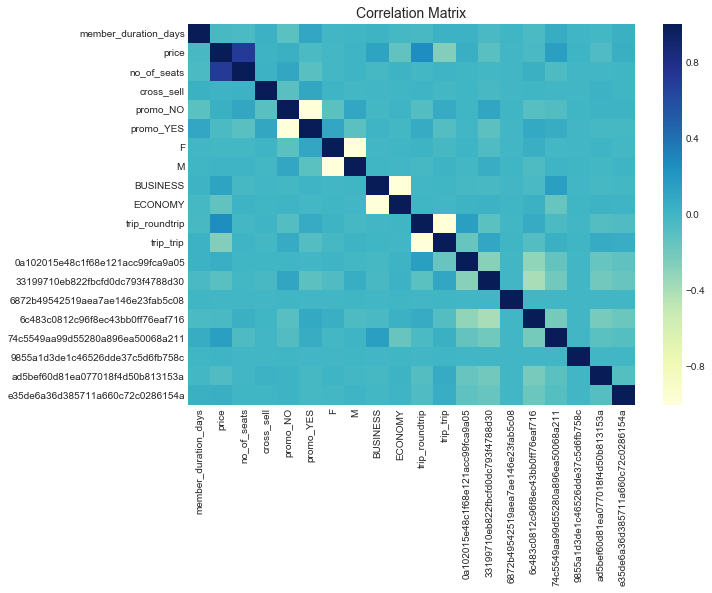

In [63]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = flight.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [65]:
test2= test.copy().drop(columns=[
    "account_id",
    "order_id",
    "gender",
    "trip",
    "service_class",
    "is_tx_promo",
    "airlines_name",
    "route",
    "hotel_id",
    "visited_city",
    "log_transaction",  
])

In [67]:
flight2.head(2)

,member_duration_days,price,no_of_seats,cross_sell,promo_NO,promo_YES,F,M,BUSINESS,ECONOMY,trip_roundtrip,trip_trip,0a102015e48c1f68e121acc99fca9a05,33199710eb822fbcfd0dc793f4788d30,6872b49542519aea7ae146e23fab5c08,6c483c0812c96f8ec43bb0ff76eaf716,74c5549aa99d55280a896ea50068a211,9855a1d3de1c46526dde37c5d6fb758c,ad5bef60d81ea077018f4d50b813153a,e35de6a36d385711a660c72c0286154a
0,566.0,885898.00,1.0,0.0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
1,607.0,2139751.25,2.0,0.0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0


In [68]:
flight2['mean_log_transaction'] = flight['log_transaction'].apply(mean_log_transaction)
flight2['price_per_seat'] = (flight['price'] / (flight['no_of_seats']))
flight2['count_visited_city'] = flight['visited_city'].apply(get_jum_visited_city)
flight2['manado'] = flight['visited_city'].apply(get_manado)
flight2['aceh'] = flight['visited_city'].apply(get_Aceh)
flight2['jogja'] = flight['visited_city'].apply(get_Jogjakarta)
flight2['semarang'] = flight['visited_city'].apply(get_Semarang)
flight2['surabaya'] = flight['visited_city'].apply(get_Surabaya)

In [69]:
flight2.head(2)

,member_duration_days,price,no_of_seats,cross_sell,promo_NO,promo_YES,F,M,BUSINESS,ECONOMY,...,ad5bef60d81ea077018f4d50b813153a,e35de6a36d385711a660c72c0286154a,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya
0,566.0,885898.00,1.0,0.0,1,0,0,1,0,1,...,0,0,1.030959e+06,885898.000,4,0,0,0,1,0
1,607.0,2139751.25,2.0,0.0,1,0,0,1,0,1,...,0,0,2.646397e+06,1069875.625,3,0,0,0,0,0


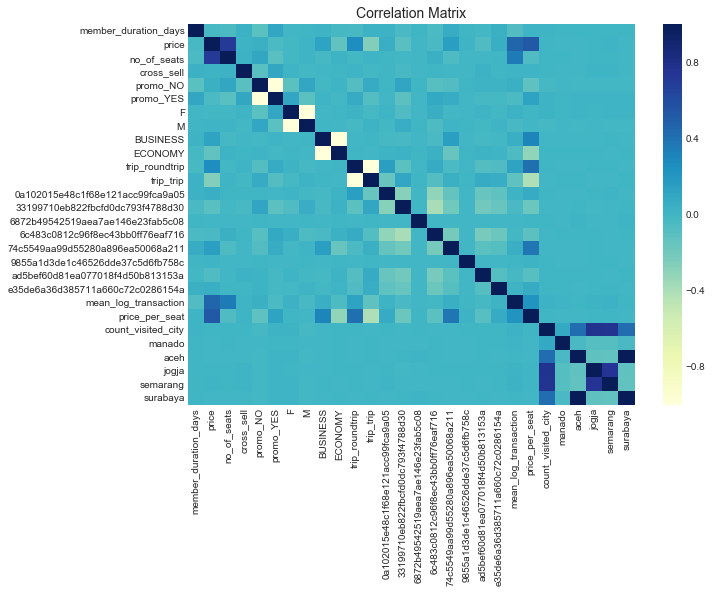

In [70]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = flight2.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

## data test2

In [78]:
#Merubah variabel kategorik biner menjadi numerik
promo2 = pd.get_dummies(test.is_tx_promo,prefix="promo") 
test.gender[test.gender == 'None'] = 'M'
gender2 = pd.get_dummies(test.gender)
kelas2 = pd.get_dummies(test.service_class)
test.trip[test.trip == 'round'] = 'roundtrip'
trip2 = pd.get_dummies(test.trip,prefix = "trip")
airlines2 = pd.get_dummies(test.airlines_name,)
test = pd.concat([test,promo2],axis=1)
test = pd.concat([test,gender2],axis=1)
test = pd.concat([test,kelas2],axis=1)
test = pd.concat([test,trip2],axis=1)
test = pd.concat([test,airlines2],axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


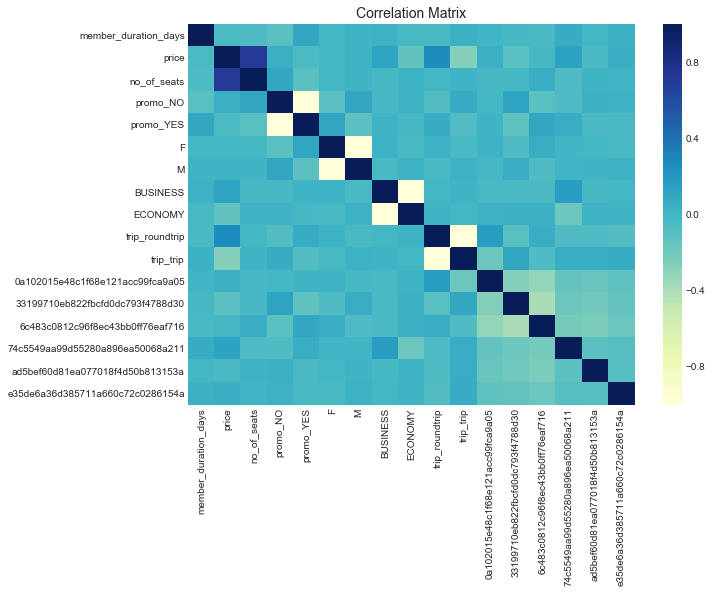

In [79]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = test.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [82]:
test2= test.copy().drop(columns=[
    "account_id",
    "order_id",
    "gender",
    "trip",
    "service_class",
    "is_tx_promo",
    "airlines_name",
    "route",
#     "hotel_id",
    "visited_city",
    "log_transaction",  
])

In [83]:
test2.head()

,member_duration_days,price,no_of_seats,promo_NO,promo_YES,F,M,BUSINESS,ECONOMY,trip_roundtrip,trip_trip,0a102015e48c1f68e121acc99fca9a05,33199710eb822fbcfd0dc793f4788d30,6c483c0812c96f8ec43bb0ff76eaf716,74c5549aa99d55280a896ea50068a211,ad5bef60d81ea077018f4d50b813153a,e35de6a36d385711a660c72c0286154a
0,1754,3143400.00,3,0,1,0,1,0,1,0,1,0,0,0,0,0,1
1,1084,2166607.04,2,1,0,1,0,0,1,0,1,0,0,0,0,0,1
2,2378,1239615.00,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0
3,576,1984060.00,2,0,1,1,0,0,1,0,1,0,1,0,0,0,0
4,862,2990624.00,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0


In [85]:
test2['mean_log_transaction'] = test['log_transaction'].apply(mean_log_transaction)
test2['price_per_seat'] = (test['price'] / (test['no_of_seats']))
test2['count_visited_city'] = test['visited_city'].apply(get_jum_visited_city)
test2['manado'] = test['visited_city'].apply(get_manado)
test2['aceh'] = test['visited_city'].apply(get_Aceh)
test2['jogja'] = test['visited_city'].apply(get_Jogjakarta)
test2['semarang'] = test['visited_city'].apply(get_Semarang)
test2['surabaya'] = test['visited_city'].apply(get_Surabaya)

In [86]:
test2.head()

,member_duration_days,price,no_of_seats,promo_NO,promo_YES,F,M,BUSINESS,ECONOMY,trip_roundtrip,...,ad5bef60d81ea077018f4d50b813153a,e35de6a36d385711a660c72c0286154a,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya
0,1754,3143400.00,3,0,1,0,1,0,1,0,...,0,1,3.151466e+06,1047800.00,3,0,0,0,0,0
1,1084,2166607.04,2,1,0,1,0,0,1,0,...,0,1,6.046241e+06,1083303.52,3,0,0,0,0,0
2,2378,1239615.00,1,1,0,0,1,0,1,1,...,1,0,3.069357e+06,1239615.00,3,0,0,0,0,0
3,576,1984060.00,2,0,1,1,0,0,1,0,...,0,0,2.726678e+06,992030.00,5,0,0,1,1,0
4,862,2990624.00,1,0,1,1,0,0,1,0,...,0,0,6.353929e+06,2990624.00,3,0,0,0,0,0


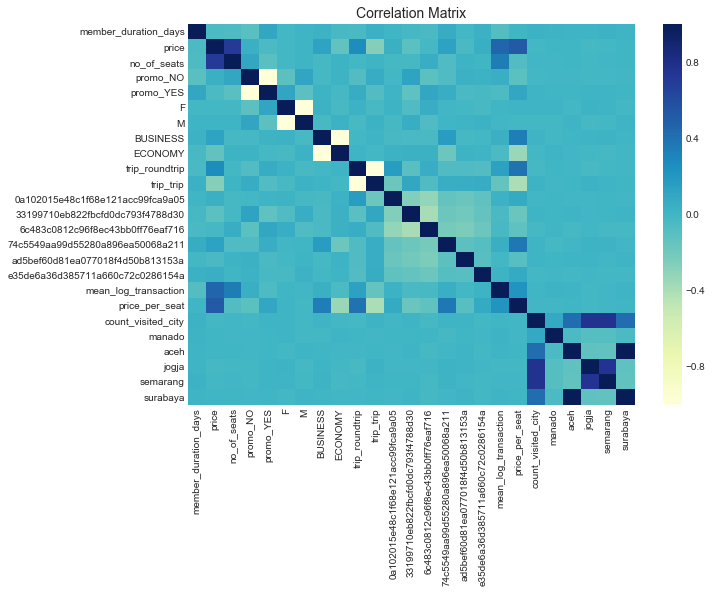

In [87]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = test2.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [99]:
rf.fit(flight2[feature2],y_clasify["cross_sell"].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [100]:
y_test_han2 = rf.predict(test2[feature2])

y_test_han2 = pd.DataFrame(data=y_test_han2)
y_test_han2 = y_test_han2.round()
dict = {1:"yes", 0:"no"}
y_test_han2[0] = y_test_han2[0].map(dict)

In [101]:
y_test_han2[0].value_counts()

no     9773
yes     227
Name: 0, dtype: int64

In [102]:
hasil = pd.DataFrame()
hasil["order_id"] = test["order_id"]
hasil["is_cross_sell"] = y_test_han2
hasil.to_csv("waaw.csv", index=False)

In [ ]:
farhan= 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix()

## untuk training yang cross sell

In [5]:
yes_cross_sell = pd.merge(flight, hotel, on='hotel_id')
yes_cross_sell.head(2)

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction,starRating,city,free_wifi,pool_access,free_breakfast
0,3fa09994a2a2b666c4d70297fc8b0ccc,838cdc9abdc1aef41199a8107e86fa1c,891.0,M,trip,ECONOMY,1909362.0,NO,2.0,e35de6a36d385711a660c72c0286154a,CGK - DPS,3d67a33588a7348ab4460186a018d125,"'['Bali', 'Jakarta', 'Medan']'","'[9266426.08, 9159198.73, 8532780.34, 1909362.0]'",5.0,bali,YES,NO,NO
1,bd673ac803130299b9b38bd57cf5d073,472031abc9953f55c6afe455ce97755f,1613.0,M,roundtrip,ECONOMY,3276065.0,YES,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,3d67a33588a7348ab4460186a018d125,"'['Medan', 'Bali', 'Jakarta']'","'[9595346.27, 6273632.8, 5388601.92, 7816864.9...",5.0,bali,YES,NO,NO


In [6]:
def get_all_visited_city(visited_city):
    city_all= []
    for a in visited_city:
        raw = re.sub(r"[\[\]\']", "", a)
        raw2 = raw.split(", ")
        city_all += raw2
    return city_all

In [7]:
city_all_test = get_all_visited_city(test["visited_city"])
temp_test= pd.DataFrame(city_all_test, columns=["city_all"])
temp_test["city_all"].value_counts()

Jakarta       10000
Bali          10000
Medan         10000
Semarang       2107
Jogjakarta     1974
Surabaya        555
Aceh            555
Manado          259
Name: city_all, dtype: int64

In [8]:
city_all = get_all_visited_city(flight["visited_city"])
temp = pd.DataFrame(city_all, columns=["city_all"])
temp["city_all"].value_counts()

Medan         117946
Jakarta       117946
Bali          117946
Semarang       25125
Jogjakarta     23411
Surabaya        6673
Aceh            6673
Manado          2926
Name: city_all, dtype: int64

In [9]:
def get_jum_visited_city(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    return len(raw2)

In [10]:
def get_manado(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    jum = [city for city in raw2 if city == "Manado"]        
    return len(jum)

In [11]:
def get_Surabaya(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    jum = [city for city in raw2 if city == "Surabaya"]        
    return len(jum)

In [12]:
def get_Aceh(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    jum = [city for city in raw2 if city == "Aceh"]        
    return len(jum)

In [13]:
def get_Jogjakarta(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    jum = [city for city in raw2 if city == "Jogjakarta"]        
    return len(jum)

In [14]:
def get_Semarang(visited_city):
    raw = re.sub(r"[\[\]\']", "", visited_city)
    raw2 = raw.split(", ")
    jum = [city for city in raw2 if city == "Semarang"]        
    return len(jum)

In [15]:
def mean_log_transaction(log_transaction):
    raw = re.sub(r"[\[\]\']", "", log_transaction)
    value = [float(x) for x in raw.split(", ")]
    return np.mean(value)

# convert feature into numeric

In [53]:
# member_duration_days_train = le.fit_transform(yes_cross_sell["member_duration_days"]).tolist()
gender_train = le.fit_transform(yes_cross_sell["gender"]).tolist()
trip_train = le.fit_transform(yes_cross_sell["trip"]).tolist()
service_class_train = le.fit_transform(yes_cross_sell["service_class"]).tolist()
# price_train = le.fit_transform(yes_cross_sell["price"]).tolist()
is_tx_promo_train = le.fit_transform(yes_cross_sell["is_tx_promo"]).tolist()
no_of_seats_train = le.fit_transform(yes_cross_sell["no_of_seats"]).tolist()
airlines_name_train = le.fit_transform(yes_cross_sell["airlines_name"]).tolist()
hotel_id_train = le.fit_transform(yes_cross_sell["hotel_id"]).tolist()
# visited_city_train = le.fit_transform(yes_cross_sell["route"]).tolist()
# starRating_train = le.fit_transform(yes_cross_sell["starRating"]).tolist()
# city_train = le.fit_transform(yes_cross_sell["city"]).tolist()
free_wifi_train = le.fit_transform(yes_cross_sell["free_wifi"]).tolist()
pool_access_train = le.fit_transform(yes_cross_sell["pool_access"]).tolist()
free_breakfast_train = le.fit_transform(yes_cross_sell["free_breakfast"]).tolist()

In [54]:
yes_cross_sell.head(2)

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction,starRating,city,free_wifi,pool_access,free_breakfast
0,3fa09994a2a2b666c4d70297fc8b0ccc,838cdc9abdc1aef41199a8107e86fa1c,891.0,M,trip,ECONOMY,1909362.0,NO,2.0,e35de6a36d385711a660c72c0286154a,CGK - DPS,3d67a33588a7348ab4460186a018d125,"'['Bali', 'Jakarta', 'Medan']'","'[9266426.08, 9159198.73, 8532780.34, 1909362.0]'",5.0,bali,YES,NO,NO
1,bd673ac803130299b9b38bd57cf5d073,472031abc9953f55c6afe455ce97755f,1613.0,M,roundtrip,ECONOMY,3276065.0,YES,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,3d67a33588a7348ab4460186a018d125,"'['Medan', 'Bali', 'Jakarta']'","'[9595346.27, 6273632.8, 5388601.92, 7816864.9...",5.0,bali,YES,NO,NO


In [55]:
train_yes_cross_sell= pd.DataFrame(
list(zip(
yes_cross_sell["member_duration_days"],
gender_train,
trip_train,
service_class_train,
yes_cross_sell["price"],
is_tx_promo_train,
yes_cross_sell["no_of_seats"],
airlines_name_train,
hotel_id_train,
# visited_city_train,
yes_cross_sell["starRating"],
# city_train,
free_wifi_train,
pool_access_train,
free_breakfast_train)), columns=[
"member_duration_days",
"gender",
"trip",
"service_class",
"price",
"is_tx_promo",
"no_of_seats",
"airlines_name",
"hotel_id",
# "visited_city",
"starRating",
# "city",
"free_wifi",
"pool_access",
"free_breakfast"])
# train_baru

In [56]:
train_yes_cross_sell['mean_log_transaction'] = yes_cross_sell['log_transaction'].apply(mean_log_transaction)
train_yes_cross_sell['price_per_seat'] = (yes_cross_sell['price'] / (yes_cross_sell['no_of_seats']))
train_yes_cross_sell['count_visited_city'] = yes_cross_sell['visited_city'].apply(get_jum_visited_city)
train_yes_cross_sell['manado'] = yes_cross_sell['visited_city'].apply(get_manado)
train_yes_cross_sell['aceh'] = yes_cross_sell['visited_city'].apply(get_Aceh)
train_yes_cross_sell['jogja'] = yes_cross_sell['visited_city'].apply(get_Jogjakarta)
train_yes_cross_sell['semarang'] = yes_cross_sell['visited_city'].apply(get_Semarang)
train_yes_cross_sell['surabaya'] = yes_cross_sell['visited_city'].apply(get_Surabaya)

In [57]:
train_yes_cross_sell.head(2)

,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,hotel_id,starRating,...,pool_access,free_breakfast,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya
0,891.0,1,2,1,1909362.0,0,2.0,5,128,5.0,...,0,0,7.216942e+06,954681.0,3,0,0,0,0,0
1,1613.0,1,1,1,3276065.0,1,1.0,2,128,5.0,...,0,0,6.470102e+06,3276065.0,3,0,0,0,0,0


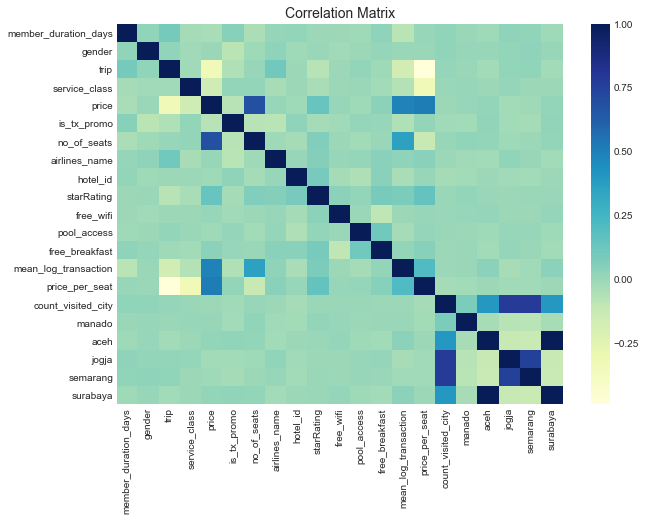

In [58]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = train_yes_cross_sell.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

# data train untuk modelling

In [59]:
# member_duration_days = le.fit_transform(flight["member_duration_days"]).tolist()
gender = le.fit_transform(flight["gender"]).tolist()
trip = le.fit_transform(flight["trip"]).tolist()
service_class = le.fit_transform(flight["service_class"]).tolist()
# price = le.fit_transform(flight["price"]).tolist()
is_tx_promo = le.fit_transform(flight["is_tx_promo"]).tolist()
# no_of_seats = le.fit_transform(flight["no_of_seats"]).tolist()
airlines_name = le.fit_transform(flight["airlines_name"]).tolist()
hotel_id = le.fit_transform(flight["hotel_id"]).tolist()
# visited_city = le.fit_transform(flight["route"]).tolist()
# city = le.fit_transform(flight["city"]).tolist()

In [60]:
hasil_feature_latih = pd.DataFrame(
list(zip(
# member_duration_days, 
gender, 
trip, 
service_class, 
# price, 
is_tx_promo, 
# no_of_seats, 
airlines_name, 
hotel_id 
# visited_city, 
# city
)), 

columns=[
# "member_duration_days"", 
"gender", 
"trip", 
"service_class",
# "price"", 
"is_tx_promo",
# "no_of_seats"", 
"airlines_name", 
"hotel_id",
# "visited_city"",
# "city"",
])

In [23]:
hasil_feature_latih["member_duration_days"] = flight["member_duration_days"]
hasil_feature_latih["price"] = flight["price"]
hasil_feature_latih["no_of_seats"] = flight["no_of_seats"]
hasil_feature_latih['mean_log_transaction'] = flight['log_transaction'].apply(mean_log_transaction)
hasil_feature_latih['price_per_seat'] = (flight['price'] / (flight['no_of_seats']))
hasil_feature_latih['count_visited_city'] = flight['visited_city'].apply(get_jum_visited_city)
hasil_feature_latih['manado'] = flight['visited_city'].apply(get_manado)
hasil_feature_latih['aceh'] = flight['visited_city'].apply(get_Aceh)
hasil_feature_latih['jogja'] = flight['visited_city'].apply(get_Jogjakarta)
hasil_feature_latih['semarang'] = flight['visited_city'].apply(get_Semarang)
hasil_feature_latih['surabaya'] = flight['visited_city'].apply(get_Surabaya)

In [24]:
hasil_feature_latih.head()

,gender,trip,service_class,is_tx_promo,airlines_name,hotel_id,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya
0,1,2,1,0,1,418,566.0,885898.00,1.0,1.030959e+06,885898.000,4,0,0,0,1,0
1,1,2,1,0,0,418,607.0,2139751.25,2.0,2.646397e+06,1069875.625,3,0,0,0,0,0
2,0,2,1,0,0,418,648.0,2695550.00,1.0,4.489474e+06,2695550.000,4,0,0,0,1,0
3,0,2,1,0,0,418,418.0,1146665.00,1.0,2.954880e+06,1146665.000,4,0,0,1,0,0
4,0,2,1,0,3,418,537.0,1131032.50,1.0,4.362199e+06,1131032.500,5,0,0,1,1,0


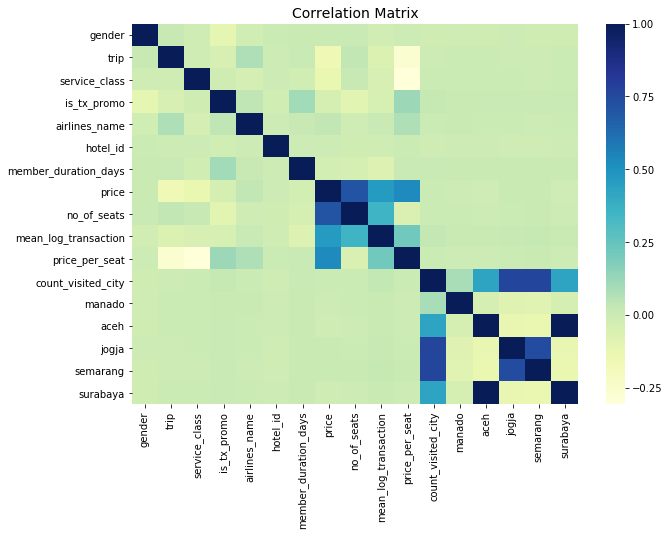

In [25]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = hasil_feature_latih.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [26]:
flight.loc[flight['hotel_id'] != "None", 'cross_sell'] = 1
flight.loc[flight['hotel_id'] == "None", 'cross_sell'] = 0
# flight = df_flight.drop(columns='hotel_id')
y_clasify = flight.copy()

In [27]:
hasil_feature_latih.head(2)

,gender,trip,service_class,is_tx_promo,airlines_name,hotel_id,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya
0,1,2,1,0,1,418,566.0,885898.00,1.0,1.030959e+06,885898.000,4,0,0,0,1,0
1,1,2,1,0,0,418,607.0,2139751.25,2.0,2.646397e+06,1069875.625,3,0,0,0,0,0


In [28]:
latih_untuk_model = hasil_feature_latih.copy().drop(columns=[
#     "mean_log_transaction",
#     "price_per_seat",
#     "count_visited_city",
    "manado",
    "aceh",
    "jogja",
    "semarang",
    "surabaya",
#     "airlines_name",
    "hotel_id",
    "service_class",
    "trip"
])

In [29]:
latih_untuk_model

,gender,is_tx_promo,airlines_name,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city
0,1,0,1,566.0,885898.00,1.0,1.030959e+06,885898.000,4
1,1,0,0,607.0,2139751.25,2.0,2.646397e+06,1069875.625,3
2,0,0,0,648.0,2695550.00,1.0,4.489474e+06,2695550.000,4
3,0,0,0,418.0,1146665.00,1.0,2.954880e+06,1146665.000,4
4,0,0,3,537.0,1131032.50,1.0,4.362199e+06,1131032.500,5
5,1,0,6,493.0,1457118.00,1.0,5.302909e+06,1457118.000,3
6,1,1,3,399.0,4773236.00,4.0,2.940502e+06,1193309.000,3
7,0,0,1,2320.0,992030.00,1.0,4.504454e+06,992030.000,3
8,0,1,0,619.0,1205815.00,1.0,5.591574e+06,1205815.000,5
9,0,0,0,2110.0,879307.00,1.0,5.021481e+06,879307.000,5


## modelling

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(latih_untuk_model,y_clasify["cross_sell"].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# data testing untuk modelling

In [31]:
# member_duration_days_test = le.fit_transform(test["member_duration_days"]).tolist()
gender_test = le.fit_transform(test["gender"]).tolist()
trip_test = le.fit_transform(test["trip"]).tolist()
service_class_test = le.fit_transform(test["service_class"]).tolist()
# price_test = le.fit_transform(test["price"]).tolist()
is_tx_promo_test = le.fit_transform(test["is_tx_promo"]).tolist()
# no_of_seats_test = le.fit_transform(test["no_of_seats"]).tolist()
airlines_name_test = le.fit_transform(test["airlines_name"]).tolist()
# hotel_id_test = le.fit_transform(test["hotel_id"]).tolist()
# visited_city_test = le.fit_transform(test["route"]).tolist()
# city_test = le.fit_transform(test["city"]).tolist()

In [32]:
hasil_feature_uji = pd.DataFrame(
list(zip(
# member_duration_days_test, 
gender_test, 
trip_test, 
service_class_test, 
# price_test, 
is_tx_promo_test, 
# no_of_seats_test, 
airlines_name_test, 
# hotel_id 
# visited_city_test, 
# city_test
)), 

columns=[
# "member_duration_days"", 
"gender", 
"trip", 
"service_class",
# "price"", 
"is_tx_promo",
# "no_of_seats"", 
"airlines_name", 
# "hotel_id",
# "visited_city"",
# "city"",
])

In [33]:
hasil_feature_uji["member_duration_days"] = test["member_duration_days"]
hasil_feature_uji["price"] = test["price"]
hasil_feature_uji["no_of_seats"] = test["no_of_seats"]
hasil_feature_uji['mean_log_transaction'] = test['log_transaction'].apply(mean_log_transaction)
hasil_feature_uji['price_per_seat'] = (test['price'] / (test['no_of_seats']))
hasil_feature_uji['count_visited_city'] = test['visited_city'].apply(get_jum_visited_city)
hasil_feature_uji['manado'] = test['visited_city'].apply(get_manado)
hasil_feature_uji['aceh'] = test['visited_city'].apply(get_Aceh)
hasil_feature_uji['jogja'] = test['visited_city'].apply(get_Jogjakarta)
hasil_feature_uji['semarang'] = test['visited_city'].apply(get_Semarang)
hasil_feature_uji['surabaya'] = test['visited_city'].apply(get_Surabaya)

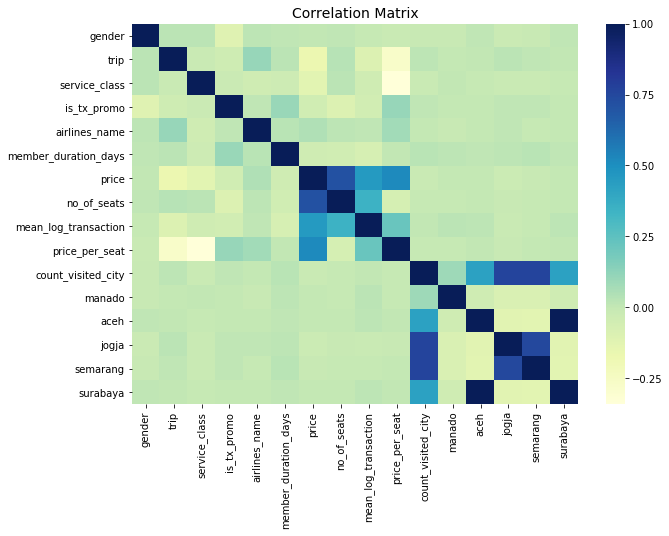

In [34]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,7))         
# Imbalanced DataFrame Correlation
corr = hasil_feature_uji.copy().corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [35]:
latih_untuk_model.head()

,gender,is_tx_promo,airlines_name,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city
0,1,0,1,566.0,885898.00,1.0,1.030959e+06,885898.000,4
1,1,0,0,607.0,2139751.25,2.0,2.646397e+06,1069875.625,3
2,0,0,0,648.0,2695550.00,1.0,4.489474e+06,2695550.000,4
3,0,0,0,418.0,1146665.00,1.0,2.954880e+06,1146665.000,4
4,0,0,3,537.0,1131032.50,1.0,4.362199e+06,1131032.500,5


In [36]:
data_prediksi = hasil_feature_uji.copy().drop(columns=[
#     "mean_log_transaction",
#     "price_per_seat",
#     "count_visited_city",
    "manado",
    "aceh",
    "jogja",
    "semarang",
    "trip",
    "surabaya",
#     "airlines_name"
    "service_class"
])

In [37]:
data_prediksi

,gender,is_tx_promo,airlines_name,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city
0,1,1,5,1754,3143400.00,3,3.151466e+06,1047800.00,3
1,0,0,5,1084,2166607.04,2,6.046241e+06,1083303.52,3
2,1,0,4,2378,1239615.00,1,3.069357e+06,1239615.00,3
3,0,1,1,576,1984060.00,2,2.726678e+06,992030.00,5
4,0,1,3,862,2990624.00,1,6.353929e+06,2990624.00,3
5,1,0,0,546,4026763.00,1,5.178854e+06,4026763.00,3
6,0,1,0,587,1630922.67,1,3.974274e+06,1630922.67,3
7,1,0,1,719,1653158.00,2,3.019646e+06,826579.00,3
8,1,1,0,697,2590770.00,1,3.541079e+06,2590770.00,3
9,0,1,4,1093,1239615.00,1,2.224527e+06,1239615.00,3


In [38]:
y_test_han = rf.predict(data_prediksi)

y_test_han = pd.DataFrame(data=y_test_han)
y_test_han = y_test_han.round()
dict = {1:"yes", 0:"no"}
y_test_han[0] = y_test_han[0].map(dict)

In [39]:
y_test_han[0].value_counts()

no     9848
yes     152
Name: 0, dtype: int64

In [40]:
y_test_han[0].value_counts()
hasil = pd.DataFrame()
hasil["order_id"] = test["order_id"]
hasil["is_cross_sell"] = y_test_han
hasil.to_csv("mempertimbangkan_feature_imortance.csv", index=False)

# coba

In [41]:
feature = hasil_feature_latih.columns
feature = feature.tolist()

In [42]:

# Credits to Gabriel Preda
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': feature, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

ValueError: arrays must all be same length

<Figure size 648x360 with 0 Axes>

In [45]:
hasil_feature_latih["clasify"] = y_clasify["cross_sell"]

In [46]:
hasil_feature_latih.head()

,gender,trip,service_class,is_tx_promo,airlines_name,hotel_id,member_duration_days,price,no_of_seats,mean_log_transaction,price_per_seat,count_visited_city,manado,aceh,jogja,semarang,surabaya,clasify
0,1,2,1,0,1,418,566.0,885898.00,1.0,1.030959e+06,885898.000,4,0,0,0,1,0,0.0
1,1,2,1,0,0,418,607.0,2139751.25,2.0,2.646397e+06,1069875.625,3,0,0,0,0,0,0.0
2,0,2,1,0,0,418,648.0,2695550.00,1.0,4.489474e+06,2695550.000,4,0,0,0,1,0,0.0
3,0,2,1,0,0,418,418.0,1146665.00,1.0,2.954880e+06,1146665.000,4,0,0,1,0,0,0.0
4,0,2,1,0,3,418,537.0,1131032.50,1.0,4.362199e+06,1131032.500,5,0,0,1,1,0,0.0


LinAlgError: singular matrix

<Figure size 432x288 with 0 Axes>

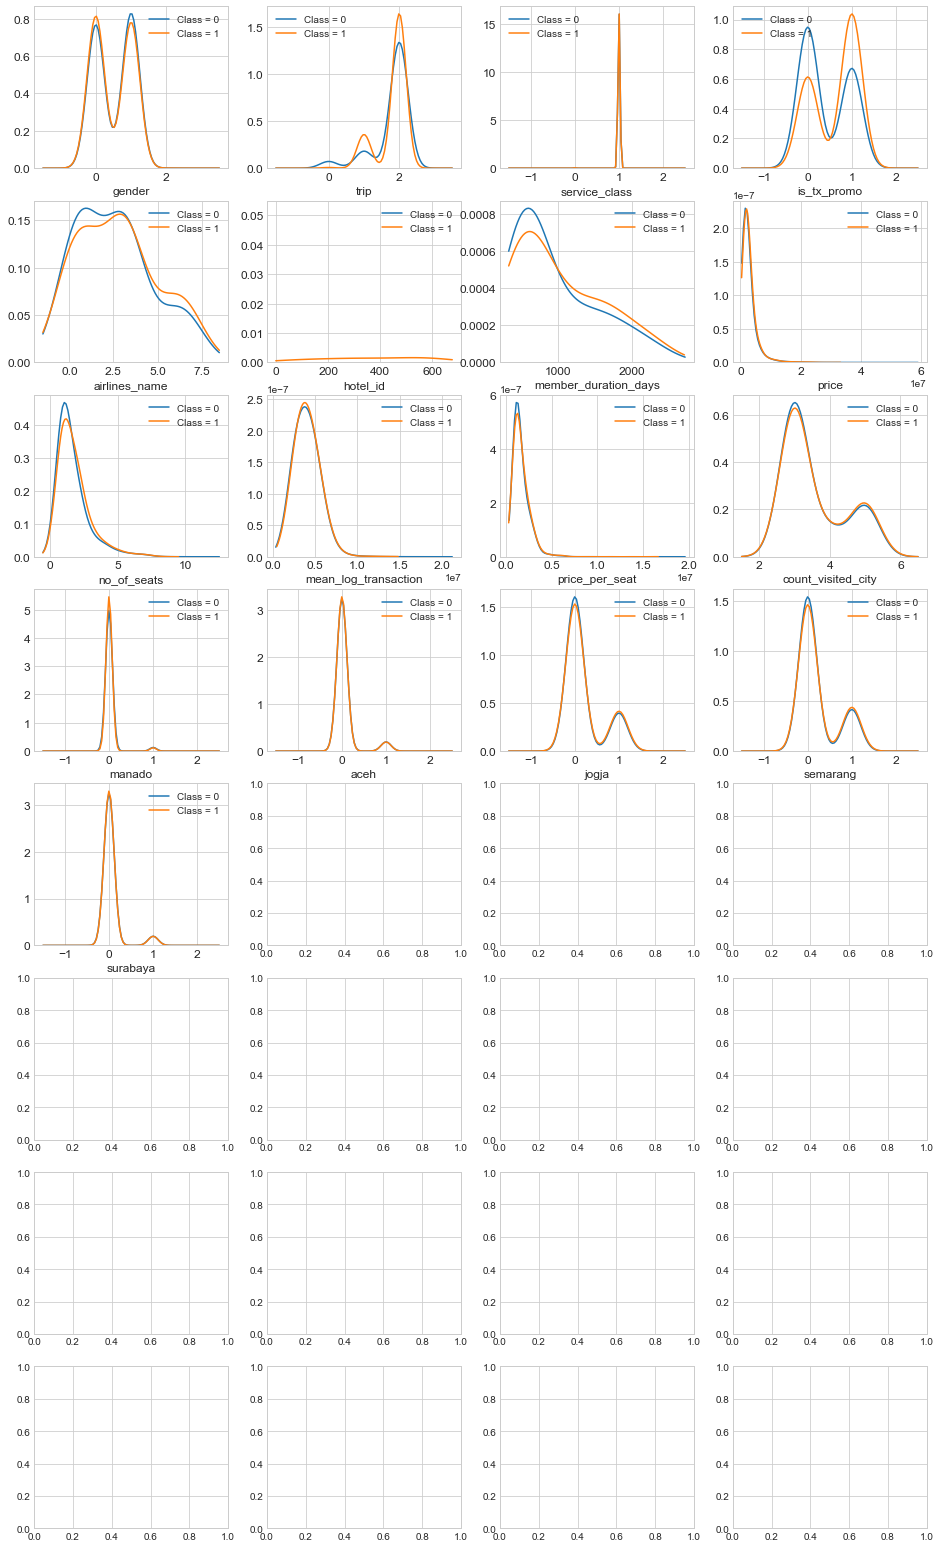

In [47]:
var = hasil_feature_latih.columns.values

i = 0
t0 = hasil_feature_latih.loc[hasil_feature_latih["clasify"] == 0]
t1 = hasil_feature_latih.loc[hasil_feature_latih["clasify"] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
# tmp = pd.DataFrame({'Feature': feature, 'Feature importance': rf.feature_importances_})
# tmp = tmp.sort_values(by='Feature importance',ascending=False)
# plt.figure(figsize = (7,4))
# plt.title('Features importance',fontsize=14)
# s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
# s.set_xticklabels(s.get_xticklabels(),rotation=90)
# plt.show() 

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 42

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [48]:
feature = ['gender',
 'trip',
 'service_class',
 'is_tx_promo',
 'airlines_name',
 'member_duration_days',
 'price',
 'no_of_seats',
 'mean_log_transaction',
 'price_per_seat',
 'count_visited_city',
 'manado',
 'aceh',
 'jogja',
 'semarang',
 'surabaya'
 ]

In [91]:
feature2=['member_duration_days', 'price', 'no_of_seats', 
       'promo_NO', 'promo_YES', 'F', 'M', 'BUSINESS', 'ECONOMY',
       'trip_roundtrip', 'trip_trip', '0a102015e48c1f68e121acc99fca9a05',
       '33199710eb822fbcfd0dc793f4788d30', 
       '6c483c0812c96f8ec43bb0ff76eaf716', '74c5549aa99d55280a896ea50068a211',
       'ad5bef60d81ea077018f4d50b813153a',
       'e35de6a36d385711a660c72c0286154a', 'mean_log_transaction',
       'price_per_seat', 'count_visited_city', 'manado', 'aceh', 'jogja',
       'semarang', 'surabaya']

In [92]:
test2.columns

Index(['member_duration_days', 'price', 'no_of_seats', 'promo_NO', 'promo_YES',
       'F', 'M', 'BUSINESS', 'ECONOMY', 'trip_roundtrip', 'trip_trip',
       '0a102015e48c1f68e121acc99fca9a05', '33199710eb822fbcfd0dc793f4788d30',
       '6c483c0812c96f8ec43bb0ff76eaf716', '74c5549aa99d55280a896ea50068a211',
       'ad5bef60d81ea077018f4d50b813153a', 'e35de6a36d385711a660c72c0286154a',
       'mean_log_transaction', 'price_per_seat', 'count_visited_city',
       'manado', 'aceh', 'jogja', 'semarang', 'surabaya'],
      dtype='object')

In [93]:
clf.fit(flight2[feature2],  y_clasify["cross_sell"].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=42, verbose=False,
                       warm_start=False)

In [97]:
preds = clf.predict(flight2[feature2])

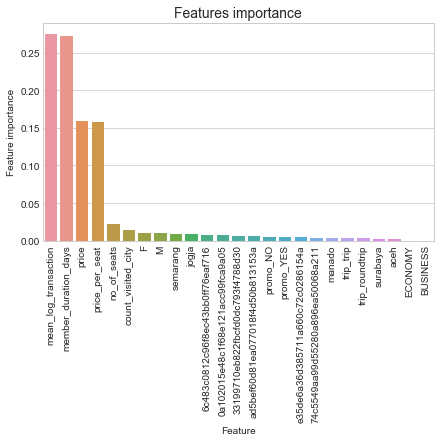

In [98]:
tmp = pd.DataFrame({'Feature': feature2, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   